In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Dataset-HUB\data2.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        10 non-null     float64
 1   Administration   10 non-null     float64
 2   Marketing Spend  10 non-null     float64
 3   State            10 non-null     object 
 4   Profit           10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 532.0+ bytes


In [5]:
cat_col = df.select_dtypes(include="object").columns

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop("Profit", axis = 1)
y = df["Profit"]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [11]:
sclr = StandardScaler()
X_train_scl = sclr.fit_transform(X_train)
X_test_scl = sclr.fit_transform(X_test)

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()
reg.fit(X_train_scl, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(X_test_scl)
print("Predicted Values: \n", y_pred[:])

Predicted Values: 
 [147673.01367776 186472.58632224]


In [16]:
df.shape

(10, 5)

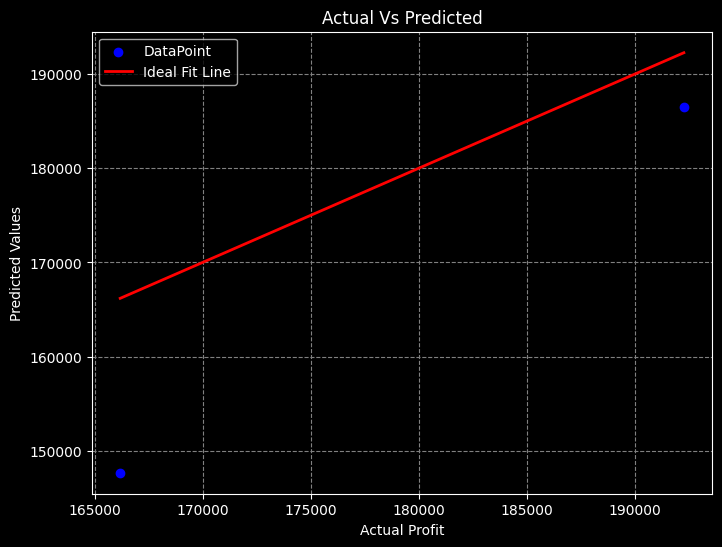

In [20]:
plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label ="DataPoint")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red",
         linewidth=2, label="Ideal Fit Line")
plt.title("Actual Vs Predicted")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True, linestyle='--',color='gray')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}\n")
print(f"MAE: {mae:.2f}\n")
print(f"RMSE: {rmse:.2f}\n")
print(f"R2 Score: {r2:.2f}\n")


MSE: 188158919.54

MAE: 12152.09

RMSE: 13717.10

R2 Score: -0.11

